# Решение 3

# Импорт библиотек

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image 
import numpy as np 
import pylab
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import random

%matplotlib inline 

In [ ]:
def show_graph(y1, y2, graph_point=10):
  Vg_value = Vg_min
  Vg_values_list = list()
  for ii in range(graph_point):
    Vg_values_list.append(Vg_value)
    Vg_value += Vg_step
  
  plt.plot(Vg_values_list, y1,
           label="Правильный график", linewidth=3)
  plt.plot(Vg_values_list, y2,
           label="Предсказанный график", linestyle='--', linewidth=3)
  
  plt.xlabel("Vg")
  plt.ylabel("Ids")

  plt.legend()
  plt.show()

# Normalization


In [ ]:
def func_normalization(data_list, list_degree=0, u=1, l=0, flag_lonely=False, min_value=None, max_value=None):
  if flag_lonely:
    value = data_list
    return (value - min_value) / (max_value - min_value) * (u - l) + l
  else:
    if list_degree == 0:
      # new_data_list = list()
      if min_value is None:
        min_value, max_value = min(data_list), max(data_list)

      for ii in range(len(data_list)):
        new_value = (data_list[ii] - min_value) / (max_value - min_value) * (u - l) + l
        data_list[ii] = new_value

    elif list_degree == 1:
      total_list = list()
      for elem in data_list:
        total_list.extend(elem)
      
      min_value, max_value = min(total_list), max(total_list)

      for ii in range(len(data_list)):
        for jj in range(graph_point):
          new_value = (data_list[ii][jj] - min_value) / (max_value - min_value) * (u - l) + l
          data_list[ii][jj] = new_value


    return data_list, min_value, max_value


In [ ]:
def func_back_normalization(data_list, min_value, max_value, list_degree=0, u=1, l=0):

  if list_degree == 0:
    for ii in range(len(data_list)):
      new_value = (data_list[ii] - l)/(u - l)*(max_value - min_value) + min_value
      data_list[ii] = new_value
  elif list_degree == 1:
    for ii in range(len(data_list)):
      for jj in range(graph_point):
        new_value = (data_list[ii][jj] - l)/(u - l)*(max_value - min_value) + min_value
        data_list[ii][jj] = new_value
  
  return data_list

# Подготовка данных

In [ ]:
# Constants
graph_point = 10

L_min = 5e-7
L_max = 3e-6
L_step = 5e-7

W_min = 5e-6
W_max = 3e-5
W_step = 5e-6

Uns_min = 0.04
Uns_max = 0.06
Uns_step = 0.06

Eo = 8.85e-12
Eox = 3.9

Tgatox_min = 6e-9
Tgatox_max = 1.2e-8
Tgatox_step = 1e-9

epsilon = 1e-10

Vg_min = 1 + epsilon
Vg_max = 5
Vg_step = (Vg_max - Vg_min) / graph_point

Vth_min = 0.7
Vth_max = 1
Vth_step = 0.05

In [ ]:
print(Vg_step)

0.39999999999


In [ ]:
def func_y(L, W, Uns, Tgatox, Vg, Vth):
  
  Ids = (W/L)*Uns*(Eo*Eox/Tgatox)*((Vg - Vth)**2/2)
  return Ids


y_min_value = func_y(L_max, W_min, Uns_min, Tgatox_max, Vg_min, Vth_max)
y_max_value = func_y(L_min, W_max, Uns_max, Tgatox_min, Vg_max, Vth_min)


def get_list(min_value, max_value, step):

  element_value = min_value
  element_list = list()
  while element_value <= max_value:
    element_list.append(element_value)
    element_value += step
  return element_list


def create_dataset(count):

  x_dataset_list = list()
  y_dataset_list = list()

  L_list = get_list(L_min, L_max, L_step)
  W_list = get_list(W_min, W_max, W_step)
  # Uns_list = get_list(Uns_min, Uns_max, Uns_step)
  Tgatox_list = get_list(Tgatox_min, Tgatox_max, Tgatox_step)
  # Vg_list = get_list(Vg_min, Vg_max, Vg_step)
  Vth_list = get_list(Vth_min, Vth_max, Vth_step)

  for ii in range(count):

    element_list = list()
    L_value = random.choice(L_list)
    W_value = random.choice(W_list)
    # Uns_value = random.choice(Uns_list)
    Uns_value = Uns_max
    Tgatox_value = random.choice(Tgatox_list)
    # Vg_value = random.choice(Vg_list)
    Vth_value = random.choice(Vth_list)

    Vg_value = Vg_min
    y_value_list = list()
  
    for jj in range(graph_point): 
      y_value_list.append(func_y(L_value, W_value, Uns_value, Tgatox_value, Vg_value, Vth_value))
      Vg_value += Vg_step

    y_dataset_list.append(np.array(y_value_list))

    element_list.append(func_normalization(L_value, flag_lonely=True, min_value=L_min, max_value=L_max))
    element_list.append(func_normalization(W_value, flag_lonely=True, min_value=W_min, max_value=W_max))
    # element_list.append(func_normalization(Uns_value, flag_lonely=True, min_value=Uns_min, max_value=Uns_max))
    element_list.append(Uns_value)
    element_list.append(func_normalization(Tgatox_value, flag_lonely=True, min_value=Tgatox_min, max_value=Tgatox_max))
    # element_list.append(func_normalization(Vg_value, flag_lonely=True, min_value=Vg_min, max_value=Vg_max))
    element_list.append(func_normalization(Vth_value, flag_lonely=True, min_value=Vth_min, max_value=Vth_max))
    x_dataset_list.append(element_list)

  y_dataset_list, y_min, y_max = func_normalization(y_dataset_list, min_value=y_min_value, max_value=y_max_value, list_degree=1)
  return np.array(x_dataset_list), np.array(y_dataset_list), y_min, y_max

In [ ]:
x_dataset_list, y_dataset_list, y_min, y_max = create_dataset(1000)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset_list, y_dataset_list, test_size=0.2, shuffle=True)

In [ ]:
def getMae(history):
  plt.plot(history.history["mae"],
           label="Точность модели на обучающей выборке.")
  plt.plot(history.history["val_mae"],
           label="Точность модели на проверяющей выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Точность модели")

  plt.legend()
  plt.show()

def getLoss(history):
  plt.plot(history.history["loss"],
           label="Ошибка на обучающей выборке.")
  plt.plot(history.history["val_loss"],
           label="Ошибка на проверочной выборке")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Ошибка модели")

  plt.legend()
  plt.show()

# Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=5, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(graph_point, activation="linear"))
model.compile(loss="mae", optimizer=Adam(0.01), metrics=['mae'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 2,794
Trainable params: 2,794
Non-trainable params: 0
_________________________________________________________________
None


# Обучение нейронной сети

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, validation_split=0.2, epochs=40, verbose=1)

Epoch 1/40
5/5 [==============================] - 1s 44ms/step - loss: 0.0828 - mae: 0.0828 - val_loss: 0.0505 - val_mae: 0.0505
Epoch 2/40
5/5 [==============================] - 0s 11ms/step - loss: 0.0423 - mae: 0.0423 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 3/40
5/5 [==============================] - 0s 11ms/step - loss: 0.0287 - mae: 0.0287 - val_loss: 0.0228 - val_mae: 0.0228
Epoch 4/40
5/5 [==============================] - 0s 13ms/step - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0179 - val_mae: 0.0179
Epoch 5/40
5/5 [==============================] - 0s 12ms/step - loss: 0.0168 - mae: 0.0168 - val_loss: 0.0154 - val_mae: 0.0154
Epoch 6/40
5/5 [==============================] - 0s 15ms/step - loss: 0.0142 - mae: 0.0142 - val_loss: 0.0135 - val_mae: 0.0135
Epoch 7/40
5/5 [==============================] - 0s 11ms/step - loss: 0.0118 - mae: 0.0118 - val_loss: 0.0127 - val_mae: 0.0127
Epoch 8/40
5/5 [==============================] - 0s 11ms/step - loss: 0.0107 - mae: 0.0107 - val

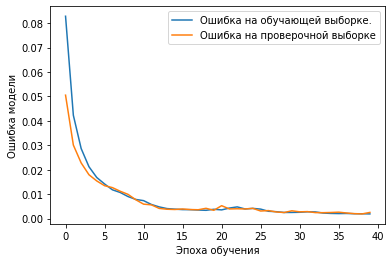

In [ ]:
getLoss(history)

Epoch 1/40
6/6 [==============================] - 1s 38ms/step - loss: 0.0020 - mae: 0.0020 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 2/40
6/6 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0016 - val_loss: 0.0023 - val_mae: 0.0023
Epoch 3/40
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0015 - val_loss: 0.0019 - val_mae: 0.0019
Epoch 4/40
6/6 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0014 - val_loss: 0.0019 - val_mae: 0.0019
Epoch 5/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 6/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 7/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0013 - val_loss: 0.0017 - val_mae: 0.0017
Epoch 8/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0013 - mae: 0.0013 - val_lo

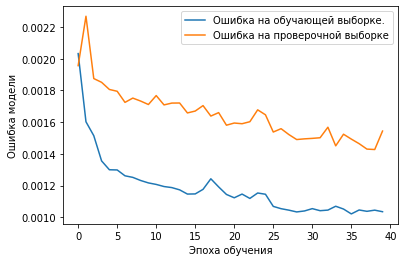

In [ ]:
model.compile(loss="mae", optimizer=Adam(0.001), metrics=['mae'])
history = model.fit(x_train, y_train, batch_size=128, validation_split=0.1, epochs=40, verbose=1)
getLoss(history)

In [ ]:
# model.compile(loss="mae", optimizer=Adam(0.0001), metrics=['mae'])
# history = model.fit(x_train, y_train, batch_size=128, validation_split=0.2, epochs=40, verbose=1)

In [ ]:
# getLoss(history)

# Результаты

In [ ]:
y_predicts = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_real_predict = func_back_normalization(y_predicts, y_min, y_max, list_degree=1)
y_true = func_back_normalization(y_test, y_min, y_max, list_degree=1)

In [ ]:
y_true[1].mean()

0.011436545250330303

In [ ]:
total_error = 0
count_element = 10
for ii in range(count_element):
  result = 0
  error = 0 

  for jj in range(graph_point):
    y_mean = y_true[ii].mean()
    one_error = abs(float(y_true[ii][jj]) - float(y_real_predict[ii][jj]))
    error += one_error
  result = round(error / graph_point / y_mean * 100, 2)
  
  print(f"Error {ii + 1} = {error}, regard error = {result}%")
  total_error +=  result

print(f"mean error: {round(total_error/count_element, 2)}%")

Error 1 = 0.0021576641235386547, regard error = 4.47%
Error 2 = 0.0010456742227998022, regard error = 0.91%
Error 3 = 0.00010601861411569879, regard error = 0.33%
Error 4 = 0.0010248216947647759, regard error = 0.3%
Error 5 = 0.0008632555067533835, regard error = 1.51%
Error 6 = 0.0013169836739225602, regard error = 0.69%
Error 7 = 0.011188161378444944, regard error = 2.73%
Error 8 = 0.0015584941186125528, regard error = 2.63%
Error 9 = 0.0011363928387493228, regard error = 2.55%
Error 10 = 0.0008762602654099904, regard error = 1.38%
mean error: 1.75%


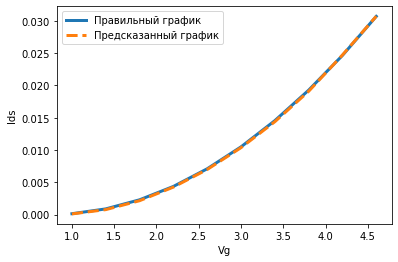

In [ ]:
show_graph(y_true[1], y_real_predict[1])

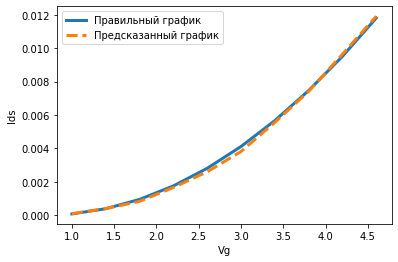

In [ ]:
show_graph(y_true[8], y_real_predict[8])

# (Сохранение весов)

In [ ]:
model.save_weights('model.h5')
# model.load_weights('model.h5')